# Engenharia de Software - MVP Sprint 4

# Avaliação de Viabilidade de Investimento em Fundos Multimercado - (***Introdução***)

## *   Definição do Problema <br>
Estabelecer uma forma simples de avaliação de viabilidade de um fundo de investimentos, com um nível razoável de assertividade, considerando um número mínimo de variáveis. Entendendo como viabilidade, o retorno positivo em um período de carência de 30 (trinta) dias corridos.
## *   Coleta e Análise de Dados <br>
São utilizados dados diários dos fundos cadastrados na Comissão de Valores Mobiliários (CVM).

--> Fonte: https://dados.cvm.gov.br/dataset/fi-doc-inf_diario

## *   Pré-processamento <br>
***Restrições:*** <br><br>
1 - Valor da Cota [VL_QUOTA] > 0 por entender que um fundo com valor de cota negativo, já é um fundo "esgotado" que não deve estar na base de análise. Além disso, há o cálculo do RETORNO, que será dado por VL_QUOTA do mês M+1 (df_2) menos VL_QUOTA no mês M (df_1), dia a dia.<br>
2 - Número de Cotistas [NR_COTST] > 15.000 por avaliar, durante análises dos dados dos datasets, que valores menores afetavam significativamente o comportamento de resgates e captações diárias.<br>
3 - Valor do Patrimônio Líquido [VL_PATRIM_LIQ] > 1.000.000 por avaliar, durante análises dos dados dos datasets, que valores menores afetavam significativamente o comportamento de resgates e captações diárias.<br>
4 - Classe do Fundo [CLASSE] = Fundo Multimercado, por ser um fundo de investimento de perfil intermediário, não tão conservador quanto um Fundo de Renda Fixa, nem tão arrojado quanto um Fundo de Ações. Todos os demais fundos constantes nos datasets (Fundo de Curto Prazo, Fundo Cambial, Fundo Referenciado, Fundo da Dívida Externa e FMP-FGTS), são fundos de classes muito específicas.<br><br>
***Feature Selection and Engineering:*** <br><br>
ATRIBUTO ALVO:: RET_VL_QUOTA = VL_QUOTA (M+1) - VL_QUOTA (M). Se RET_VL_QUOTA > 0, SUGESTÃO = 1, investimento VIÁVEL, caso contrário SUGESTÃO = 0, INVIÁVEL. O atributo alvo será o campo [SUGESTÃO].<br>
FEATURES:: Foram pré-selecionadas 7 (sete) colunas das 10 (dez) originais.<br><br>

***OBS*** - Foram utilizados os meses 9/23 e 10/23 para geração das bases de treino e teste. Foram utilizados os meses 7/23 e 8/23 para geração da base de simulação.
## *   Modelagem e Inferência <br>
Etapa que avalia e otimiza os modelos estudados. Avaliou-se, a partir do score de precisão, Linha Base, Normalização e Padronização, e com os modelos de melhor performance, selecionou-se os que passaram ao tuning, utilizando o grid search para busca das melhores combinações de parâmetros por modelo. Esta última etapa foi feita modelo a modelo, por conta do tempo de processamento para realização de modelos mais complexos.
## *   Pós-processamento <br>
O objetivo foi balancear os resultados de acurácia com o de precisão, considerando a precisão como mais crítica. Entende-se que, apontar um falso positivo para a viabilidade de um investimento, é mais crítico do que inviabilizar um investimento. Ou seja, um falso positivo pode levar a comprometimento de recurso financeiro.
## *   Apresentação de Resultados <br>
Foi gerado um dataframe (df_simula) com dados para simulação, e utilizados samples randomicos para verificar a performance da acurácia e precisão pelo classification report.
## *   Implantação do Modelo e Geração de Valor
Exporta para 'My Drive' no Google Drive,  um arquivo .pkl com o modelo utilizado e um outro arquivo, que tem o scaler utilizado.




# COLETA E ANÁLISE DE DADOS

##__Requirements e Imports

**Requirements**

In [357]:
!pip install scikit-learn
!pip install gdown
!pip install ipywidgets

**Imports**

In [358]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import gdown
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import ipywidgets as widgets
import sklearn

from google.colab import drive
from google.colab import files

from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.utils import class_weight
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from pickle import dump, load

from scipy import stats
from IPython.display import display, Javascript, display_html, HTML

print(f"Atentar para a mesma versão do sklearn no ambiente de desenvolvimento {sklearn.__version__}")


Atentar para a mesma versão do sklearn no ambiente de desenvolvimento 1.2.2


##__Carga dos Datasets

**Configuração da Carga**

In [359]:
data_info = []

####### URL #######
url = f'https://drive.google.com/uc?id='

####### PARÂMETROS DOS ARQUIVOS COM DADOS PARA GERAR OS DATAFRAMES DE ATRIBUTOS #######
# data_info[0][1][0] é o ID do arquivo no google drive
data_info.append(('df_1', ["1R8vASJ_vSzykspidSdAVEXvnWIW8gIiG", "arq_atrib_1.csv", ";"]))
data_info[0][1].append(url + data_info[0][1][0])
data_info.append(('df_2', ["1eFlNnCsX8HtRjAgPA2IsM-9nzKwG3FLD", "arq_atrib_2.csv", ";"]))
data_info[1][1].append(url + data_info[1][1][0])

####### PARÂMETROS DOS ARQUIVOS COM DADOS PARA GERAR GOLD DATA #######
# data_info[0][1][0] é o ID do arquivo no google drive
data_info.append(('df_simula_1', ["1VHRraIKFONVEEZ9xz7P4CmAjDY-C0BYY", "arq_simula_1.csv", ";"]))
data_info[2][1].append(url + data_info[2][1][0])
data_info.append(('df_simula_2', ["1EsWfx-f0mcp4pVEEkls_oqCZjouXr6Ze", "arq_simula_2.csv", ";"]))
data_info[3][1].append(url + data_info[3][1][0])

####### PARÂMETROS DO ARQUIVO DE CADASTRO DOS FUNDOS DE INVESTIMENTO #######
# data_info[0][1][0] é o ID do arquivo no google drive
data_info.append(('df_cad', ["1yO9-XahOdUOj00g9SyBBETASc84mRNtt", "arq_cad.csv", ";"]))
data_info[4][1].append(url + data_info[4][1][0])

**Realização da Carga**

In [360]:

for dataframe, arquivo in data_info:
  gdown.download(arquivo[3], arquivo[1], quiet=False)

# Lê os arquivos
df_1 = pd.read_csv(data_info[0][1][1], delimiter=data_info[0][1][2])
df_cr1 = df_1
df_2 = pd.read_csv(data_info[1][1][1], delimiter=data_info[1][1][2])
df_cr2 = df_2
df_simula_1 = pd.read_csv(data_info[2][1][1], delimiter=data_info[2][1][2])
df_simula_rstart_1 = df_simula_1
df_simula_2 = pd.read_csv(data_info[3][1][1], delimiter=data_info[3][1][2])
df_simula_rstart_2 = df_simula_2
df_cad = pd.read_csv(data_info[4][1][1], delimiter=data_info[4][1][2])


Downloading...
From: https://drive.google.com/uc?id=1R8vASJ_vSzykspidSdAVEXvnWIW8gIiG
To: /content/arq_atrib_1.csv
100%|██████████| 46.2M/46.2M [00:00<00:00, 185MB/s]
Downloading...
From: https://drive.google.com/uc?id=1eFlNnCsX8HtRjAgPA2IsM-9nzKwG3FLD
To: /content/arq_atrib_2.csv
100%|██████████| 49.0M/49.0M [00:00<00:00, 144MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VHRraIKFONVEEZ9xz7P4CmAjDY-C0BYY
To: /content/arq_simula_1.csv
100%|██████████| 48.1M/48.1M [00:00<00:00, 163MB/s]
Downloading...
From: https://drive.google.com/uc?id=1EsWfx-f0mcp4pVEEkls_oqCZjouXr6Ze
To: /content/arq_simula_2.csv
100%|██████████| 52.9M/52.9M [00:00<00:00, 211MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yO9-XahOdUOj00g9SyBBETASc84mRNtt
To: /content/arq_cad.csv
100%|██████████| 3.59M/3.59M [00:00<00:00, 220MB/s]


**Análise Inicial dos Dados**

In [361]:
# Criação de DataFrames temporários para armazenar os tipos de dados e contagens
temp1 = pd.DataFrame(df_1.dtypes, columns=['df_1_tipo'])
temp2 = pd.DataFrame(df_1.count(), columns=['df_1_count'])

temp3 = pd.DataFrame(df_2.dtypes, columns=['df_2_tipo'])
temp4 = pd.DataFrame(df_2.count(), columns=['df_2_count'])

temp5 = pd.DataFrame(df_cad.dtypes, columns=['df_cad_tipo'])
temp6 = pd.DataFrame(df_cad.count(), columns=['df_cad_count'])

# Concatenação dos DataFrames lado a lado
TypCol1 = pd.concat([temp1, temp2, temp3, temp4], axis=1)
TypCol2 = pd.concat([temp5, temp6], axis=1)

# Criando dicionário com os dados dos shapes
NumCol = {
 'df_1': df_1.shape,
 'df_2': df_2.shape,
 'df_cad': df_cad.shape
}

df_exib = pd.DataFrame(NumCol, index=['Número de linhas', 'Número de colunas'])
print(df_exib)
print()

# Exibição do tipo de dados nas colunas e consistência entre colunas
print(TypCol1)
print()
print(TypCol2)

# Serão utilizadas em df_1 e df_2, as colunas: CNPJ_FUNDO, DT_COMPTC, VL_QUOTA, VL_PATRIM_LIQ, CAPTC_DIA, RESG_DIA e NR_COTST.
# Serão utilizadas em df_cad, as colunas: CNPJ_FUNDO e CLASSE.

                     df_1    df_2  df_cad
Número de linhas   505556  537278   57126
Número de colunas       9       9       5

              df_1_tipo  df_1_count df_2_tipo  df_2_count
TP_FUNDO         object      505556    object      537278
CNPJ_FUNDO       object      505556    object      537278
DT_COMPTC        object      505556    object      537278
VL_TOTAL        float64      505556   float64      537278
VL_QUOTA         object      505556    object      537278
VL_PATRIM_LIQ   float64      505556   float64      537278
CAPTC_DIA       float64      505556   float64      537278
RESG_DIA        float64      505556   float64      537278
NR_COTST          int64      505556     int64      537278

              df_cad_tipo  df_cad_count
CNPJ_FUNDO         object         57126
DT_REG             object         57126
CLASSE             object         57126
DT_INI_CLASSE      object         57126
DT_FIM_CLASSE      object          5844


# PRÉ-PROCESSAMENTO

**Pré-processamento inicial**

In [362]:
# Reinicializa os dataframes para não precisar recarregar os arquivos durante os testes
df_cr1 = df_1
df_cr2 = df_2
df_simula_1 = df_simula_rstart_1
df_simula_2 = df_simula_rstart_2

In [363]:
# Trata a coluna VL_QUOTA que, como visto na "Análise Inicial dos Dados", na etapa "__Carga dos Datasets", está como "object" e deveria ser float com 12 casas,
# conforme dicionário (Dicionário.txt presente tbm no github) de dados presente em "https://dados.cvm.gov.br/dataset/fi-doc-inf_diario".

df_cr1['VL_QUOTA'] = df_cr1['VL_QUOTA'].astype(str).str.replace('.', '')
df_cr1['VL_QUOTA'] = df_cr1['VL_QUOTA'].astype(float)
df_cr1['VL_QUOTA'] = df_cr1['VL_QUOTA'] / (10**12)

df_cr2['VL_QUOTA'] = df_cr2['VL_QUOTA'].astype(str).str.replace('.', '')
df_cr2['VL_QUOTA'] = df_cr2['VL_QUOTA'].astype(float)
df_cr2['VL_QUOTA'] = df_cr2['VL_QUOTA'] / (10**12)

df_simula_1['VL_QUOTA'] = df_simula_1['VL_QUOTA'].astype(str).str.replace('.', '')
df_simula_1['VL_QUOTA'] = df_simula_1['VL_QUOTA'].astype(float)
df_simula_1['VL_QUOTA'] = df_simula_1['VL_QUOTA'] / (10**12)

df_simula_2['VL_QUOTA'] = df_simula_2['VL_QUOTA'].astype(str).str.replace('.', '')
df_simula_2['VL_QUOTA'] = df_simula_2['VL_QUOTA'].astype(float)
df_simula_2['VL_QUOTA'] = df_simula_2['VL_QUOTA'] / (10**12)

##__Restrições

###___Restrição 1 (VL_QUOTA>0)

In [364]:
# Restringindo o valor de VL_QUOTA > 0 (não faz sentido realizar uma avaliação de dados de um fundo com valor da cota negativo)

df_cr1 = df_cr1[(df_cr1['VL_QUOTA'] > 0)]
df_cr2 = df_cr2[(df_cr2['VL_QUOTA'] > 0)]

df_simula_1 = df_simula_1[(df_simula_1['VL_QUOTA'] > 0)]
df_simula_2 = df_simula_2[(df_simula_2['VL_QUOTA'] > 0)]

# Comparando o número de linhas e colunas entre o df original e o com restrição
data = {
    'df_1': df_1.shape,
    'df_cr1': df_cr1.shape,
    'df_2': df_2.shape,
    'df_cr2': df_cr2.shape,
}

df_exib = pd.DataFrame(data, index=['Número de linhas', 'Número de colunas'])
print(df_exib)

                     df_1  df_cr1    df_2  df_cr2
Número de linhas   505556  503795  537278  535747
Número de colunas       9       9       9       9


###___Restrições 2 e 3 (Limites de NR_COTST e VL_PATRIM_LIQ)

In [365]:
# Aplicando a RESTRIÇÃO 2 estabelecendo o Limite Inferior para o Número de Cotistas
LimInf_NR_COTST = 15000

# Aplicando a RESTRIÇÃO 3 estabelecendo o Limite Inferior para o Valor do Patrimônio Líquido
LimInf_VL_PATRIM_LIQ = 1000000

df_cr1 = df_cr1[(df_cr1['NR_COTST'] >= LimInf_NR_COTST) & (df_cr1['VL_PATRIM_LIQ'] >= LimInf_VL_PATRIM_LIQ)]
df_cr2 = df_cr2[(df_cr2['NR_COTST'] >= LimInf_NR_COTST) & (df_cr2['VL_PATRIM_LIQ'] >= LimInf_VL_PATRIM_LIQ)]

df_simula_1 = df_simula_1[(df_simula_1['NR_COTST'] >= LimInf_NR_COTST) & (df_simula_1['VL_PATRIM_LIQ'] >= LimInf_VL_PATRIM_LIQ)]
df_simula_2 = df_simula_2[(df_simula_2['NR_COTST'] >= LimInf_NR_COTST) & (df_simula_2['VL_PATRIM_LIQ'] >= LimInf_VL_PATRIM_LIQ)]

# Comparando o número de linhas e colunas
data = {
    'df_1': df_1.shape,
    'df_cr1': df_cr1.shape,
    'df_2': df_2.shape,
    'df_cr2': df_cr2.shape
}

df_exib = pd.DataFrame(data, index=['Número de linhas', 'Número de colunas'])
print(df_exib)

                     df_1  df_cr1    df_2  df_cr2
Número de linhas   505556    5011  537278    5318
Número de colunas       9       9       9       9


###___Restrição 4 (Restringindo CLASSE)

In [366]:
# Aplicando a RESTRIÇÃO 4 estabelecendo a Classe do Fundo de Investimento como uma classe pré definida
Lim_Class = "Fundo Multimercado"

# Realizando o merge com a base de cadastro dos fundos, onde há a imformação da Classe do fundo df_cad['CLASSE']
df_cr1 = df_cr1.merge(df_cad[['CNPJ_FUNDO', 'CLASSE']], on='CNPJ_FUNDO', how='left')
df_cr1 = df_cr1[(df_cr1['CLASSE'] == Lim_Class)]
df_cr2 = df_cr2.merge(df_cad[['CNPJ_FUNDO', 'CLASSE']], on='CNPJ_FUNDO', how='left')
df_cr2 = df_cr2[(df_cr2['CLASSE'] == Lim_Class)]

df_simula_1 = df_simula_1.merge(df_cad[['CNPJ_FUNDO', 'CLASSE']], on='CNPJ_FUNDO', how='left')
df_simula_1 = df_simula_1[(df_simula_1['CLASSE'] == Lim_Class)]
df_simula_2 = df_simula_2.merge(df_cad[['CNPJ_FUNDO', 'CLASSE']], on='CNPJ_FUNDO', how='left')
df_simula_2 = df_simula_2[(df_simula_2['CLASSE'] == Lim_Class)]

# Comparando o número de linhas e colunas
data = {
    'df_1': df_1.shape,
    'df_cr1': df_cr1.shape,
    'df_2': df_2.shape,
    'df_cr2': df_cr2.shape
}

df_exib = pd.DataFrame(data, index=['Número de linhas', 'Número de colunas'])
print(df_exib)
print()

# Contar o número de linhas onde a coluna 'CLASSE' é diferente de vazio em df_cr1
countnoempity_df_cr1 = df_cr1[df_cr1['CLASSE'] != ''].shape[0]
countempity_df_cr1 = df_cr1[df_cr1['CLASSE'] == ''].shape[0]

# Contar o número de linhas onde a coluna 'CLASSE' é diferente de vazio em df_cr2
countnoempity_df_cr2 = df_cr2[df_cr2['CLASSE'] != ''].shape[0]
countempity_df_cr2 = df_cr2[df_cr2['CLASSE'] == ''].shape[0]

print(f"O número de linhas onde a coluna 'CLASSE' é diferente de vazio em df_cr1 é: {countnoempity_df_cr1}")
print(f"O número de linhas onde a coluna 'CLASSE' é vazio em df_cr1 é: {countempity_df_cr1}")
print()
print(f"O número de linhas onde a coluna 'CLASSE' é diferente de vazio em df_cr2 é: {countnoempity_df_cr2}")
print(f"O número de linhas onde a coluna 'CLASSE' é vazio em df_cr2 é: {countempity_df_cr2}")

                     df_1  df_cr1    df_2  df_cr2
Número de linhas   505556    1490  537278    1535
Número de colunas       9      10       9      10

O número de linhas onde a coluna 'CLASSE' é diferente de vazio em df_cr1 é: 1490
O número de linhas onde a coluna 'CLASSE' é vazio em df_cr1 é: 0

O número de linhas onde a coluna 'CLASSE' é diferente de vazio em df_cr2 é: 1535
O número de linhas onde a coluna 'CLASSE' é vazio em df_cr2 é: 0


##__Feature Selection and Engineering

In [367]:
# Considerando somente os dígitos referente ao "dia" em DT_COMPTC (Data de competência do documento)
df_cr1['DT_COMPTC_DIA'] = df_cr1['DT_COMPTC'].str.slice(0, 2)
df_cr2['DT_COMPTC_DIA'] = df_cr2['DT_COMPTC'].str.slice(0, 2)
df_simula_1['DT_COMPTC_DIA'] = df_simula_1['DT_COMPTC'].str.slice(0, 2)
df_simula_2['DT_COMPTC_DIA'] = df_simula_2['DT_COMPTC'].str.slice(0, 2)

# Definindo o index para o JOIN
df_cr1.set_index(['CNPJ_FUNDO', 'DT_COMPTC_DIA'], inplace=True)
df_cr2.set_index(['CNPJ_FUNDO', 'DT_COMPTC_DIA'], inplace=True)
df_simula_1.set_index(['CNPJ_FUNDO', 'DT_COMPTC_DIA'], inplace=True)
df_simula_2.set_index(['CNPJ_FUNDO', 'DT_COMPTC_DIA'], inplace=True)

# JOIN os dois DataFrames usando o índice e gera o Dataframe de Atributos (df_atrib) e o gold dataframe (df_simula)
df_atrib = df_cr1.join(df_cr2, rsuffix='_1')
df_simula = df_simula_1.join(df_simula_2, rsuffix='_1')

# Reseta o índice
df_atrib.reset_index(inplace=True)
df_simula.reset_index(inplace=True)

### CALCULANDO O(S) RETORNO(S) ###

# Calculando os retornos "RET", dia a dia e arredondando em conformidade com as casas decimais definidas no Dicionário de Dados
df_atrib['RET_VL_QUOTA'] = (df_atrib['VL_QUOTA_1'] - df_atrib['VL_QUOTA']).round(12) # retorno sobre o Patrimônio Líquido
df_simula['RET_VL_QUOTA'] = (df_simula['VL_QUOTA_1'] - df_simula['VL_QUOTA']).round(12) # retorno sobre o Patrimônio Líquido

# Mantém somente as colunas referentes ao mês M
df_atrib = df_atrib.filter(regex='[^_1]$')
df_simula = df_simula.filter(regex='[^_1]$')

### DEFININDO O ATRIBUTO ALVO ###

# Avaliação DIRETA sobre o Retorno do Valor da Quota: Se o retorno do Valor da Quota é negativo ou zero, INVIÁVEL (0),
# caso contrário, VIÁVEL(1).

df_atrib['SUGESTÃO'] = df_atrib.apply(lambda row: 0 if row['RET_VL_QUOTA'] <= 0 else 1, axis=1)
df_simula['SUGESTÃO'] = df_simula.apply(lambda row: 0 if row['RET_VL_QUOTA'] <= 0 else 1, axis=1)

df_atrib = df_atrib.reset_index()
df_simula = df_simula.reset_index()

df_atrib['SUGESTÃO'] = df_atrib['SUGESTÃO'].astype(int)
atrib_alvo = "SUGESTÃO" # definição do Atributo Alvo

df_simula['SUGESTÃO'] = df_simula['SUGESTÃO'].astype(int)

# Concluindo o Feature Selection and engineering com a pré-seleção de colunas.
df_atrib = df_atrib[['RESG_DIA', 'CAPTC_DIA', 'NR_COTST', 'VL_PATRIM_LIQ', 'VL_QUOTA', 'VL_TOTAL', 'SUGESTÃO']]
df_simula = df_simula[['RESG_DIA', 'CAPTC_DIA', 'NR_COTST', 'VL_PATRIM_LIQ', 'VL_QUOTA', 'VL_TOTAL', 'SUGESTÃO']]


##__Apresentação e Análise dos Atributos (antes da separação Treino/Teste)

                   df_atrib
Número de linhas       1490
Número de colunas         7

*** Verificando se alguma coluna tem valores nulos ou vazios ***

RESG_DIA         False
CAPTC_DIA        False
NR_COTST         False
VL_PATRIM_LIQ    False
VL_QUOTA         False
VL_TOTAL         False
SUGESTÃO         False
dtype: bool

*** Avaliação de df_atrib ***

              df_atrib_dtypes  df_atrib_count
RESG_DIA              float64            1490
CAPTC_DIA             float64            1490
NR_COTST                int64            1490
VL_PATRIM_LIQ         float64            1490
VL_QUOTA              float64            1490
VL_TOTAL              float64            1490
SUGESTÃO                int64            1490

*** Avaliação do balanceamento de classes ***

Contagem de ocorrências em df_atrib:
 1    1137
0     353
Percentual de ocorrências em df_atrib:
 1    76.308725
0    23.691275
Name: SUGESTÃO, dtype: float64



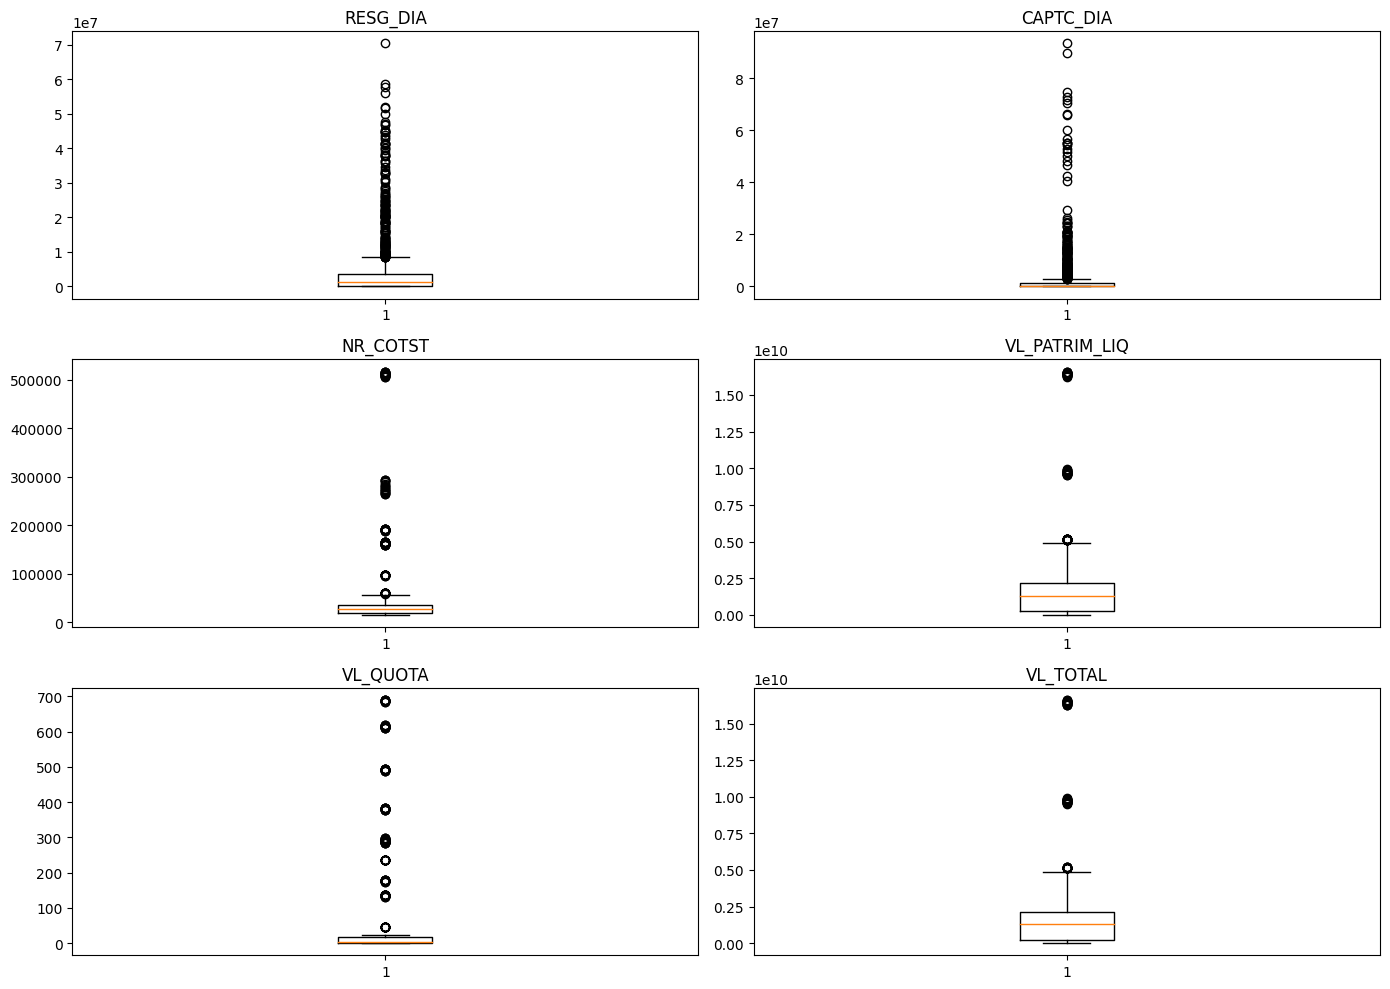

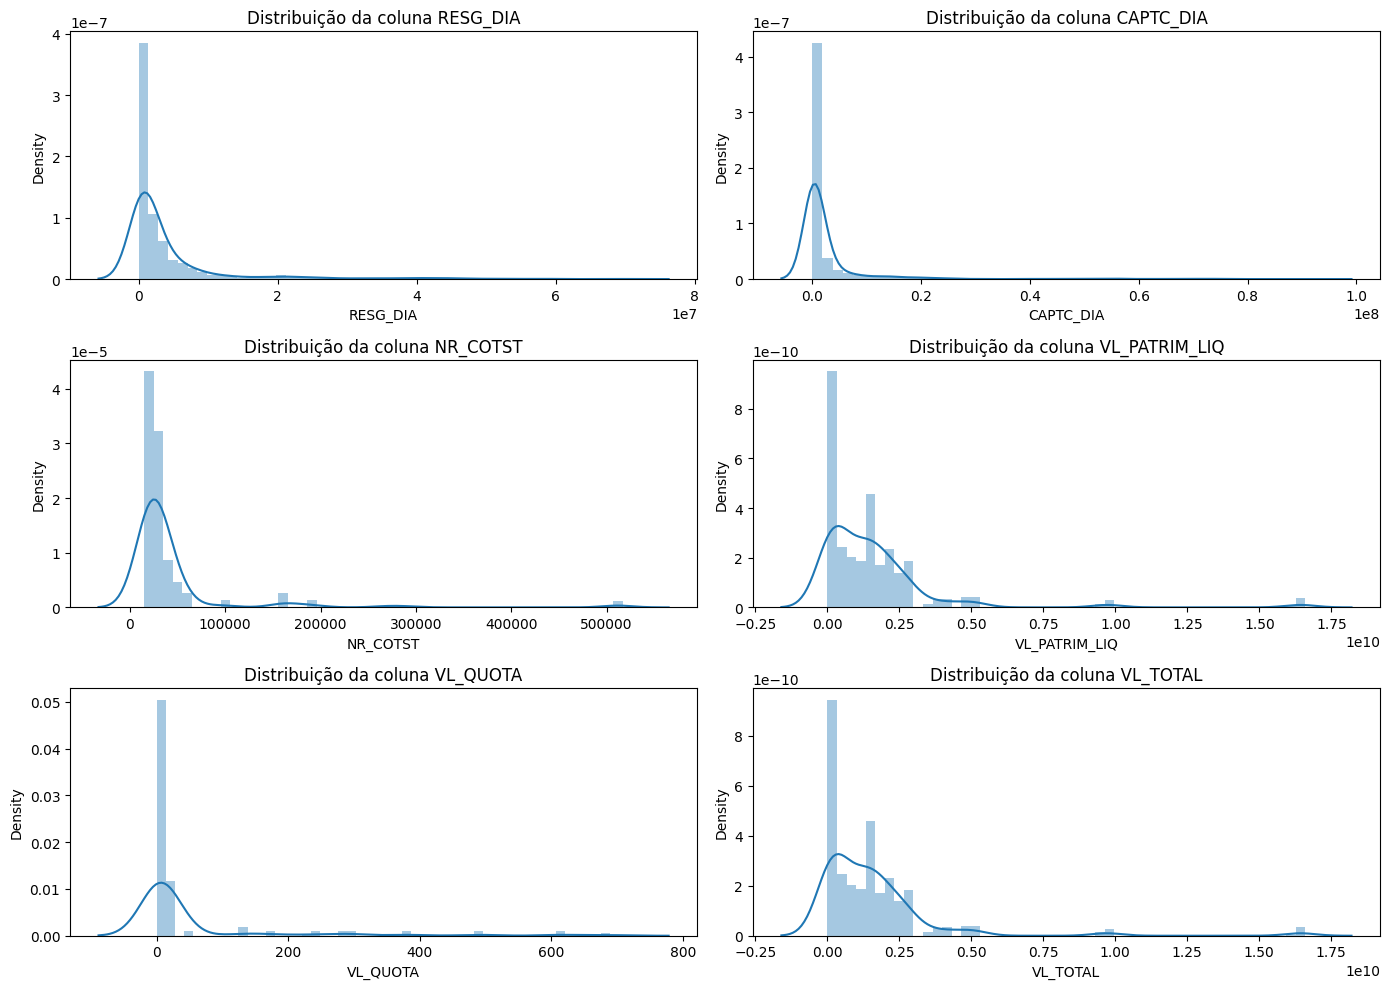

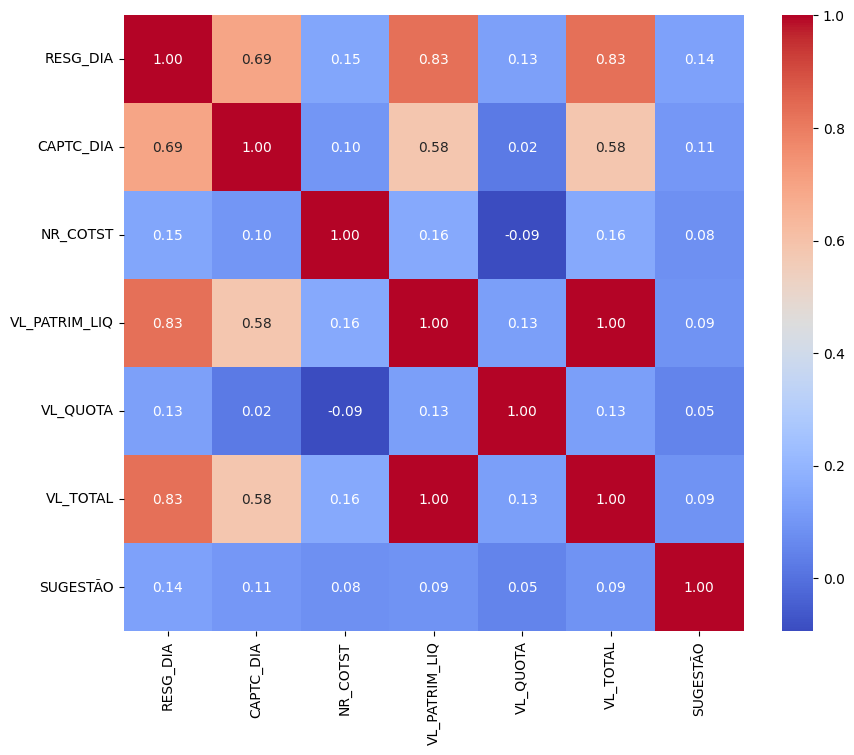

In [368]:
####### AVALIANDO OS DADOS #######

### DADOS TABELADOS ###

# Comparando o número de linhas e colunas
data = {
    'df_atrib': df_atrib.shape,
}

df_exib = pd.DataFrame(data, index=['Número de linhas', 'Número de colunas'])

print(df_exib)
print()

# Verificando se alguma coluna tem valores nulos ou vazios (missing parameters)
print("*** Verificando se alguma coluna tem valores nulos ou vazios ***")
print()
print((df_atrib.isnull() | (df_atrib == '')).any())
print()

df_atrib

# Criação de DataFrames temporários para armazenar os tipos de dados e contagens
temp1 = pd.DataFrame(df_atrib.dtypes, columns=['df_atrib_dtypes'])
temp2 = pd.DataFrame(df_atrib.count(), columns=['df_atrib_count'])

# Criação de DataFrames temporários para armazenar as informações de shape
temp3 = pd.DataFrame([df_atrib.shape])

# Concatenação dos DataFrames lado a lado
result = pd.concat([temp1, temp2], axis=1)

# Comportamento de SUGESTÃO
counts = df_atrib['SUGESTÃO'].value_counts()

# Exibição do resultado
print("*** Avaliação de df_atrib ***")
print()
print(result)
print()

print("*** Avaliação do balanceamento de classes ***")
print()
# Contagem de ocorrências em df_atrib
contagem_atrib = counts.to_string(dtype=False)
print("Contagem de ocorrências em df_atrib:\n", contagem_atrib)
percent_atrib = df_atrib['SUGESTÃO'].value_counts(normalize=True) * 100
print("Percentual de ocorrências em df_atrib:\n", percent_atrib)
print()

### BOXPLOT ###

df_box = df_atrib.drop(atrib_alvo, axis=1)
cols = ['RESG_DIA', 'CAPTC_DIA', 'NR_COTST', 'VL_PATRIM_LIQ', 'VL_QUOTA', 'VL_TOTAL']

fig, axs = plt.subplots(3, 2, figsize=(14, 10))

for i, col in enumerate(cols):
    ax = axs[i//2, i%2]  # Determina a posição do subplot
    ax.boxplot(df_box[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

### DISTRIBUIÇÃO LINEAR ###

# Cria uma figura com 2 linhas e 2 colunas de subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 10))

# Para cada coluna, cria um gráfico de distribuição linear
for i, col in enumerate(cols):
    sns.distplot(df_atrib[col], ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title('Distribuição da coluna {}'.format(col))

plt.tight_layout()
plt.show()

### MAPA DE CALOR DE CORRELAÇÃO ###

# Seleciona as colunas de interesse

# Calcula a matriz de correlação
cols = ['RESG_DIA', 'CAPTC_DIA', 'NR_COTST', 'VL_PATRIM_LIQ', 'VL_QUOTA', 'VL_TOTAL', 'SUGESTÃO']
corr = df_atrib[cols].corr()

# Cria um mapa de calor com a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=corr.columns, yticklabels=corr.columns)

plt.show()

##__Separação em conjunto de treino e conjunto de teste com holdout

In [369]:
####### DEFININDO PARÂMETROS DO CONJUNTO DE TREINO e TESTE #######

test_size = 0.30 # tamanho do conjunto de teste
# base original e as bases X_train e X_test).
seed=7
num_particoes = 10 # número de partições para validação cruzada
np.random.seed(7) # definindo uma semente global para este bloco

y = df_atrib[atrib_alvo] # Atributo alvo em y

# Separando os atributos do atributo alvo
X = df_atrib.drop(atrib_alvo, axis=1) # Demais atributos em x

# Separação entre base de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=seed, stratify=y)

# Cria kfold para validação cruzada
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação


##__Comparação: Original versus X_treino, X_test e y_train, y_test

*** Avaliação do balanceamento de classes ***

Percentual de ocorrências em df_atrib:
 1    76.308725
0    23.691275
Name: SUGESTÃO, dtype: float64


Percentual de ocorrências em y_train:
 1    76.318313
0    23.681687
Name: SUGESTÃO, dtype: float64


Percentual de ocorrências em y_test:
 1    76.286353
0    23.713647
Name: SUGESTÃO, dtype: float64

*** BOXPLOT ***



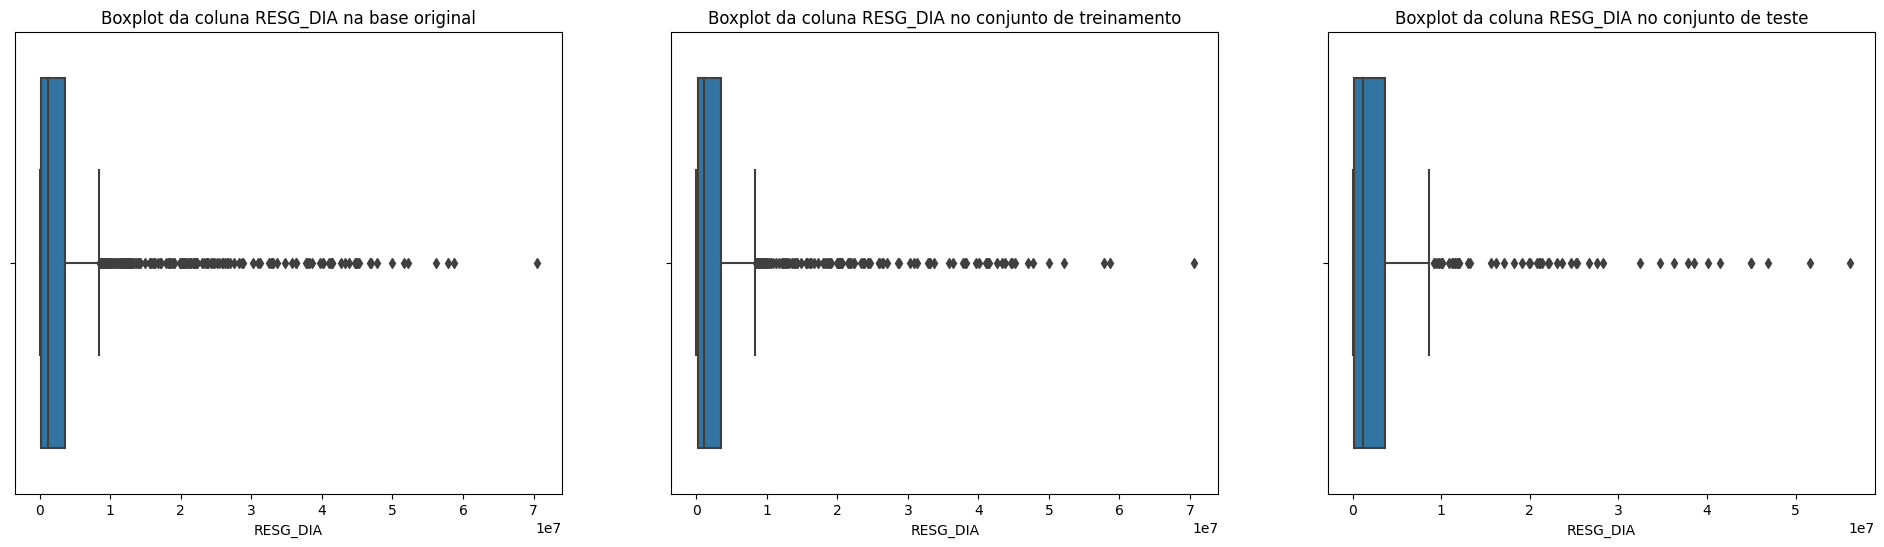

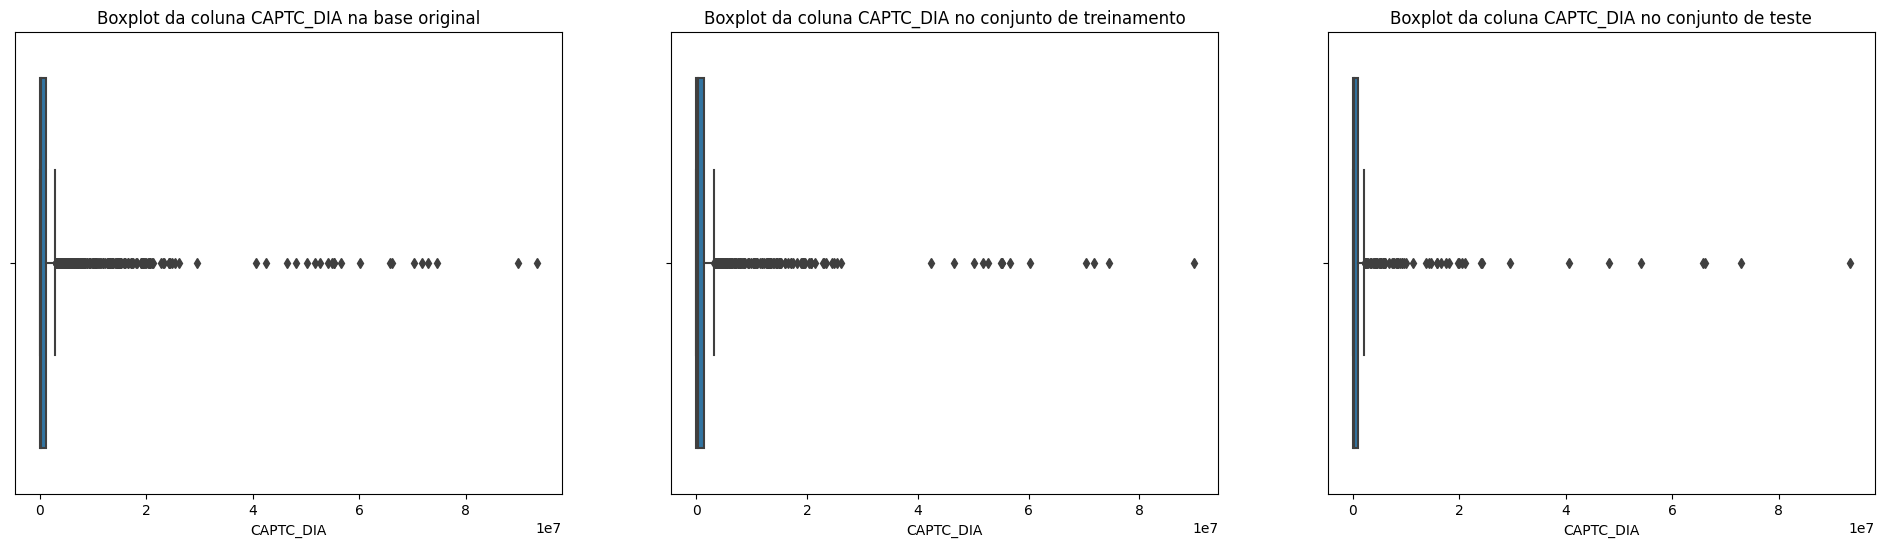

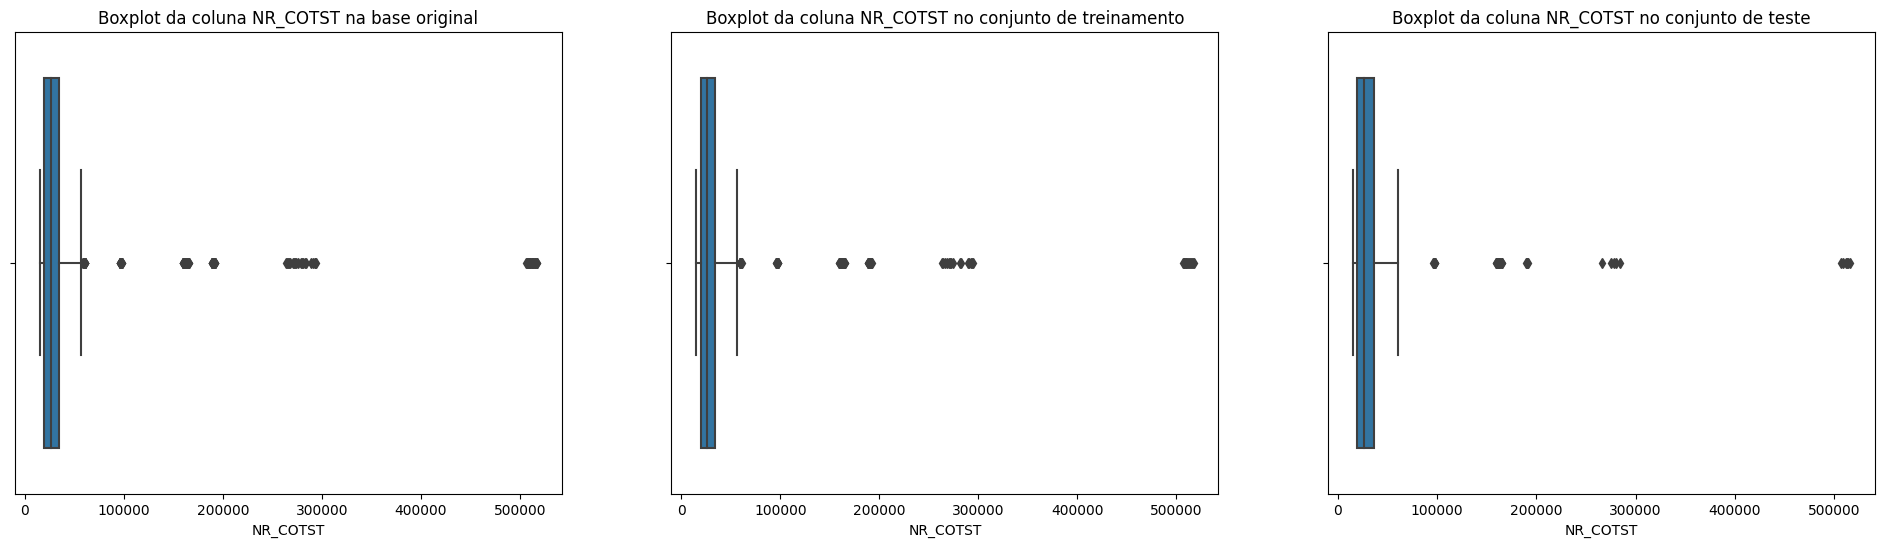

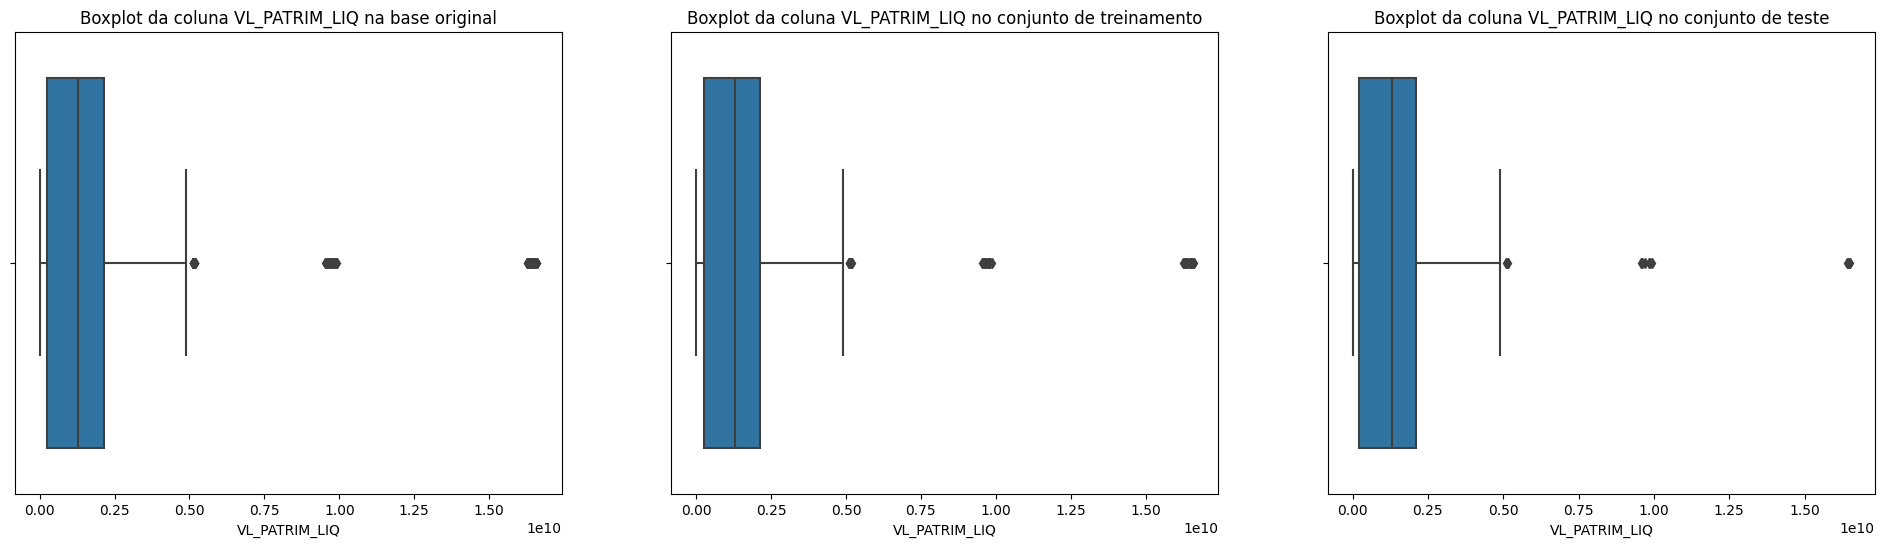

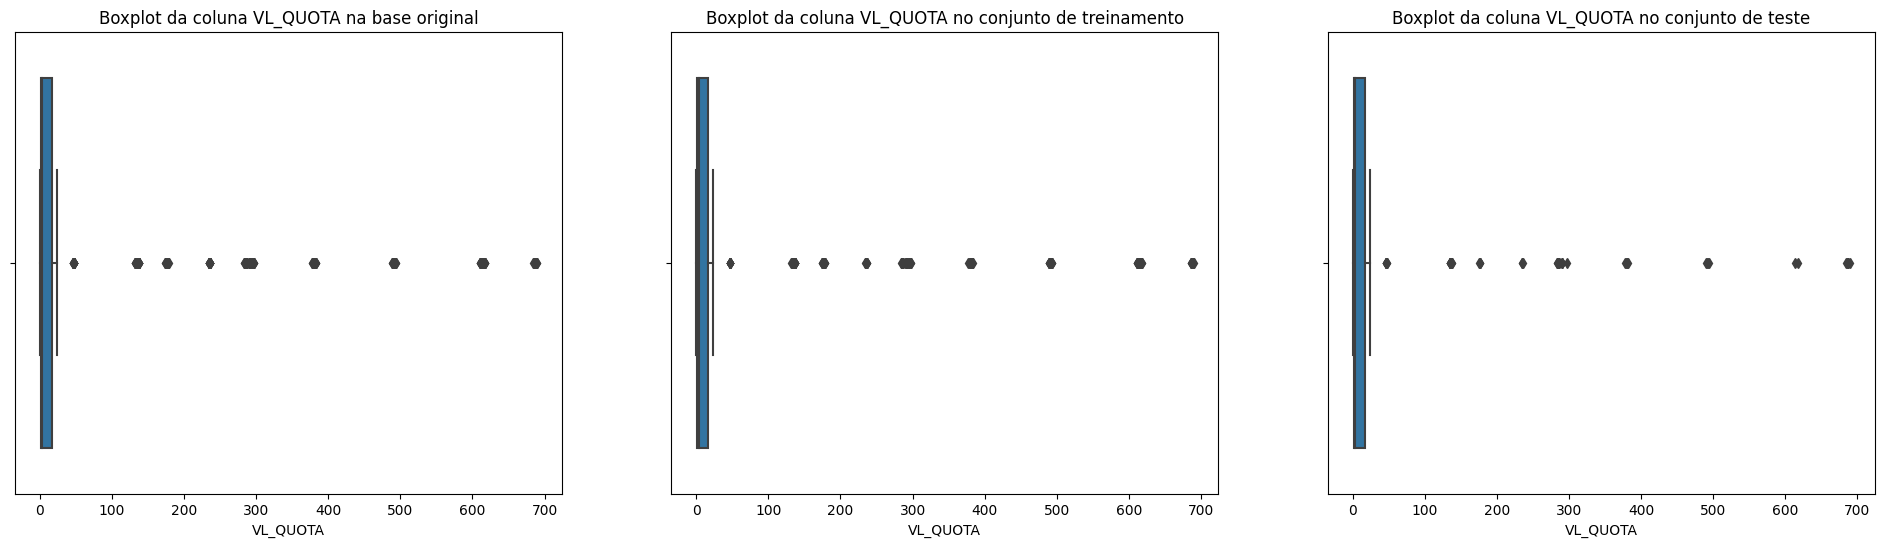

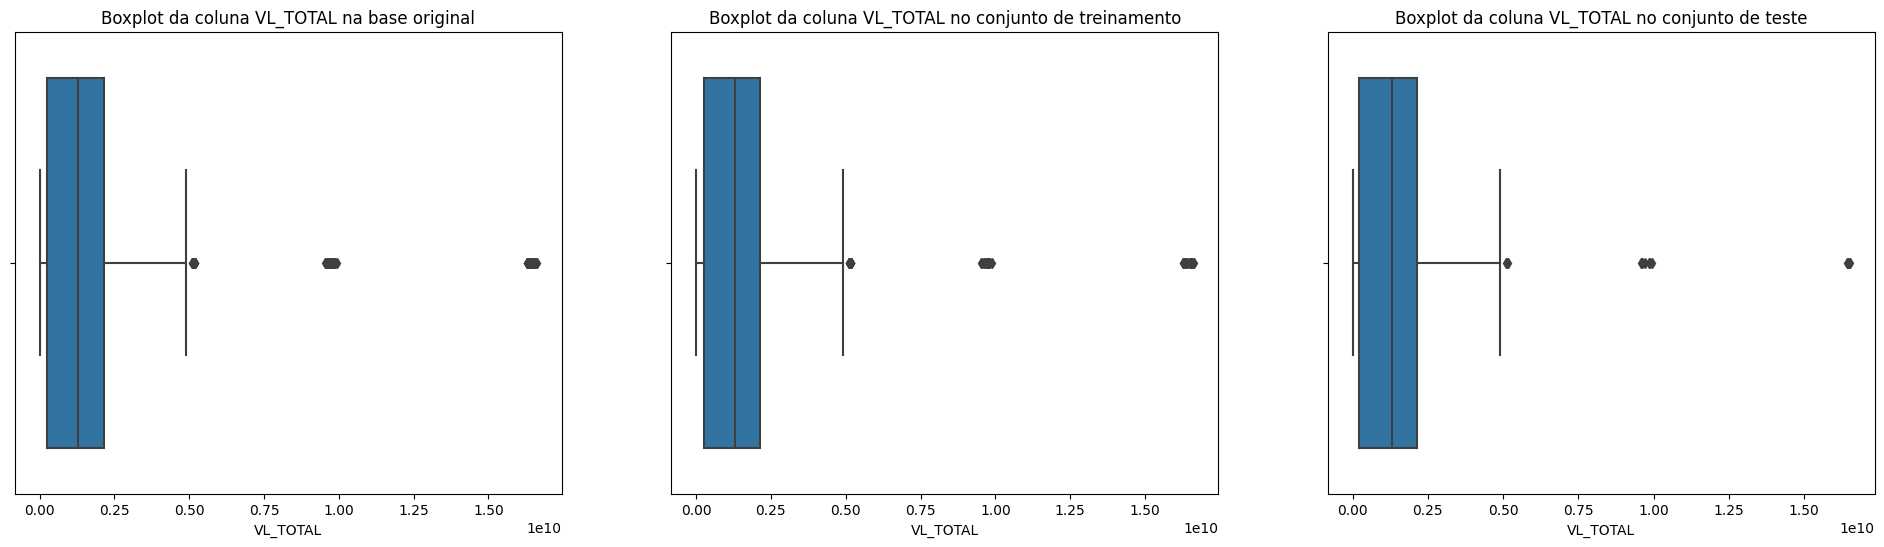


*** MAPA DE CALOR de Correlação ***



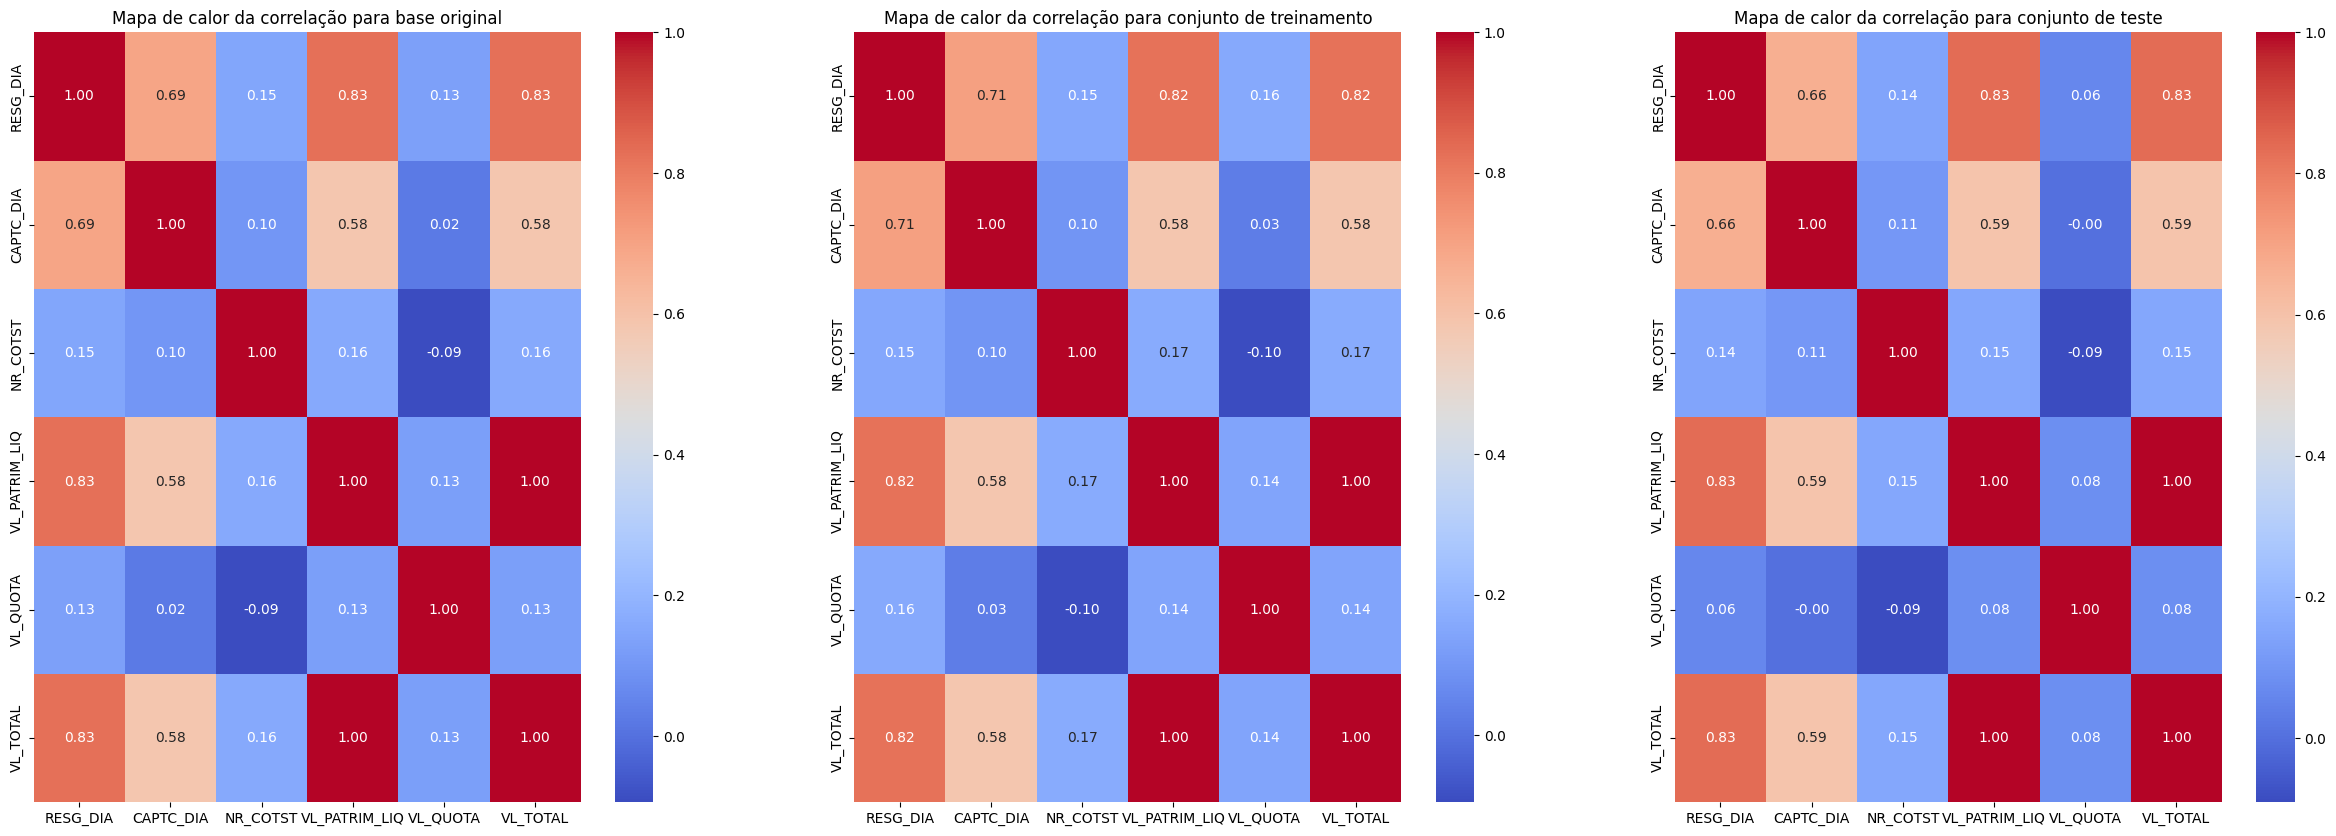

In [370]:
print("*** Avaliação do balanceamento de classes ***")
print()

# Contagem de ocorrências em df_atrib
contagem_atrib = df_atrib['SUGESTÃO'].value_counts(normalize=True) * 100
print("Percentual de ocorrências em df_atrib:\n", contagem_atrib)
print()

# Contagem de ocorrências em y_train
contagem_y_train = y_train.value_counts(normalize=True) * 100
print("\nPercentual de ocorrências em y_train:\n", contagem_y_train)
print()

# Contagem de ocorrências em y_test
contagem_y_test = y_test.value_counts(normalize=True) * 100
print("\nPercentual de ocorrências em y_test:\n", contagem_y_test)
print()

### BOXPLOT PARA COMPARAÇÃO DOS DADOS DE TREINO E TESTE ###
print("*** BOXPLOT ***")
print()
# Obtém as colunas do dataframe de treinamento (o número de colunas é o mesmo para o dataframe de teste)
colunas = X_train.columns

# Cria um boxplot para cada coluna nos conjuntos de treinamento e teste
df_atrib_saa = df_atrib.drop(atrib_alvo, axis=1) # todos os demais atributos sem o atributo alvo (sem SUGESTÃO)
for col in colunas:
    fig, axs = plt.subplots(1, 3, figsize=(24, 6))  # cria uma figura com 3 subplots (lado a lado)

    # Boxplot da coluna no conjunto de treinamento
    sns.boxplot(x=df_atrib_saa[col], ax=axs[0])
    axs[0].set_title('Boxplot da coluna ' + col + ' na base original')

    # Boxplot da coluna no conjunto de treinamento
    sns.boxplot(x=X_train[col], ax=axs[1])
    axs[1].set_title('Boxplot da coluna ' + col + ' no conjunto de treinamento')

    # Boxplot da coluna no conjunto de teste
    sns.boxplot(x=X_test[col], ax=axs[2])
    axs[2].set_title('Boxplot da coluna ' + col + ' no conjunto de teste')

    plt.show()

print()

### MAPA DE CALOR DE CORRELAÇÃO ###
print("*** MAPA DE CALOR de Correlação ***")
print()

# Lista de dataframes para análise
dfs = [df_atrib_saa, X_train, X_test]
df_names = ['base original', 'conjunto de treinamento', 'conjunto de teste']

# Cria uma figura com 3 subplots (lado a lado)
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

# Loop através de cada dataframe
for i in range(len(dfs)):
    # Calcula a matriz de correlação
    corr = dfs[i].corr()

    # Cria um mapa de calor com a matriz de correlação
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=corr.columns, yticklabels=corr.columns, ax=axs[i])
    axs[i].set_title('Mapa de calor da correlação para ' + df_names[i])

plt.show()


# MODELAGEM E INFERÊNCIA

##__Seleção de Atributos

***Seleção do Método***

Foram realizados testes também com: Ganho de Informação e Qui-quadrado, sendo o método ANOVA o que apresentou melhor resposta frente à precisão, sempre buscando por quatro "melhores" variáveis (k=4).

In [371]:
selector = SelectKBest(f_classif, k=4) # ANOVA

***Aplicando o método selecionado***

Para ajustar `X_test` e `y_test` de acordo com a seleção de atributos feita em `X_train`, aplica-se a mesma transformação de seleção de atributos ao conjunto de teste. No entanto, é importante notar que está sendo usado o método `transform()`, e não `fit_transform()`, ao transformar o conjunto de teste. Isso porque não se quer ajustar o seletor aos dados de teste, mas sim aplicar a mesma transformação que foi aprendida nos dados de treinamento.

In [372]:
# Aplicando o modelo selecionado para separação dos atributos
X_train_new = selector.fit_transform(X_train, y_train)

mask = selector.get_support()
selected_features = X.columns[mask]
df_atrib_new = pd.DataFrame(X_train_new, columns=selected_features)

df_atrib_new['SUGESTÃO'] = df_atrib['SUGESTÃO']
y_train_new = df_atrib_new['SUGESTÃO']

# Transformando X_test com o mesmo seletor
X_test_new = selector.transform(X_test)

# Colunas selecionadas
colunas = df_atrib_new.columns

# Colunas definidas pela seleção de atributos
print("Colunas definidas pela seleção de atributos")
print(colunas)


Colunas definidas pela seleção de atributos
Index(['RESG_DIA', 'CAPTC_DIA', 'VL_PATRIM_LIQ', 'VL_TOTAL', 'SUGESTÃO'], dtype='object')


## _Criação e avaliação de modelos: linha base

LR: 0.766817 (0.010052)
CART: 0.766143 (0.017988)
KNN: 0.765226 (0.010706)
SVM: 0.763187 (0.004069)
NB: 0.758953 (0.008628)
O score que está sendo utilizado é: precision



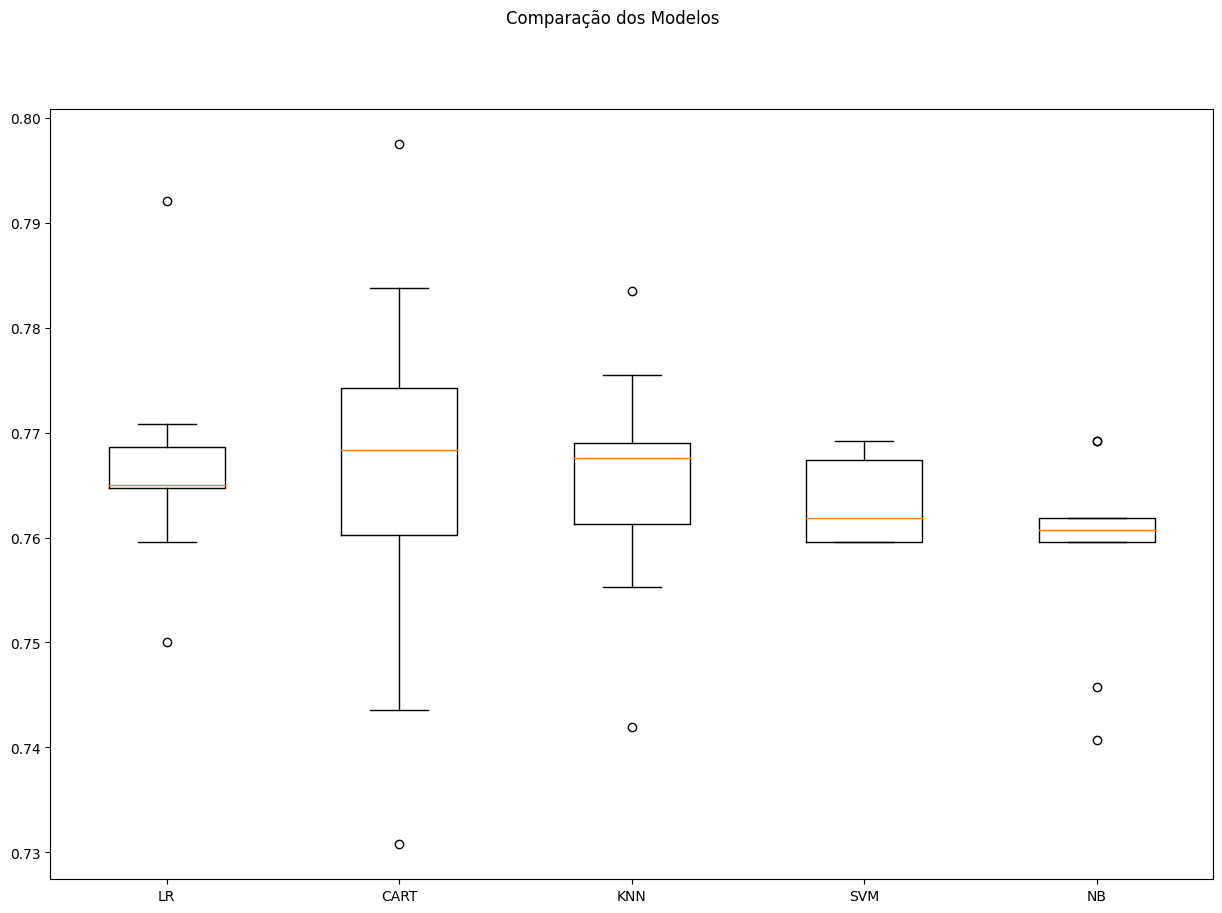

In [373]:
####### DEFINIÇÃO DE PARÂMETROS GERAIS #######
np.random.seed(7) # definindo uma semente global
scoring = 'precision' # definição do score

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    # Usando base de treino com a seleção de atributos train_new (obtido na etaoa "Seleção de Atributos")
    cv_results = cross_val_score(model, X_train_new, y_train_new, cv=kfold, scoring=scoring)
    # Armazenando os resultados
    results.append((name, cv_results))

# Ordenando os resultados em ordem decrescente
results.sort(key=lambda x: x[1].mean(), reverse=True)

# Imprimindo os resultados ordenados
for name, cv_results in results:
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

print("O score que está sendo utilizado é: " + scoring)
print()

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot([x[1] for x in results])  # usando os resultados ordenados para o boxplot
ax.set_xticklabels([x[0] for x in results])  # usando os nomes dos modelos ordenados para o boxplot
plt.show()


## _Criação e avaliação de modelos: dados padronizados e normalizados

CART-orig: 0.770 (0.017)
LR-orig: 0.767 (0.010)
CART-norm: 0.766 (0.019)
KNN-orig: 0.765 (0.011)
CART-padr: 0.764 (0.020)
SVM-orig: 0.763 (0.004)
LR-padr: 0.763 (0.004)
SVM-norm: 0.763 (0.004)
LR-norm: 0.763 (0.004)
SVM-padr: 0.763 (0.004)
KNN-padr: 0.762 (0.014)
KNN-norm: 0.759 (0.015)
NB-orig: 0.759 (0.009)
NB-padr: 0.759 (0.009)
NB-norm: 0.759 (0.009)

O melhor modelo é: CART-orig
O score que está sendo utilizado é: precision



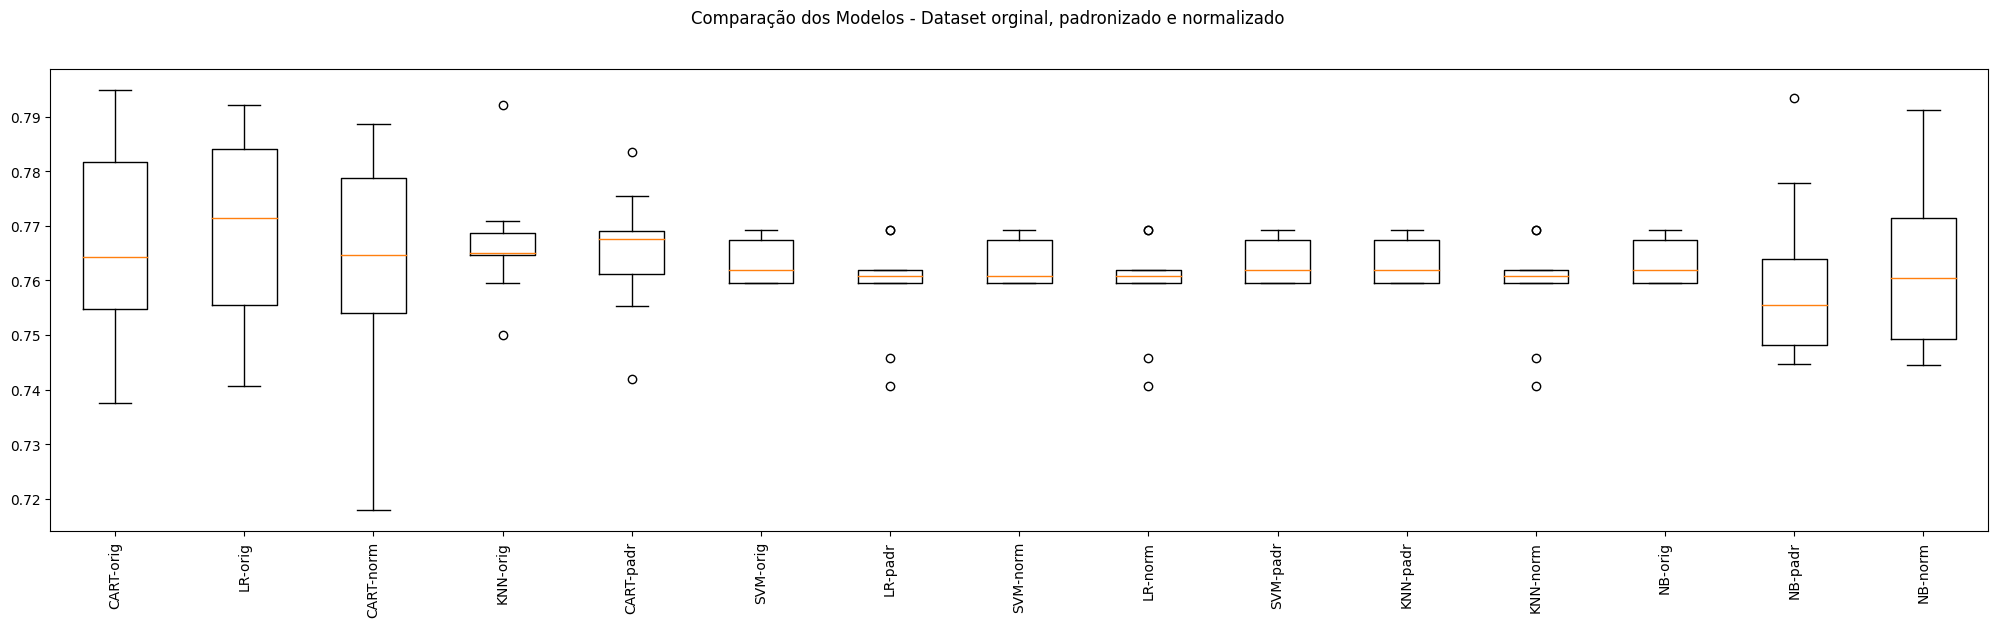

In [374]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os pipelines e os resultados
pipelines = []
names = []
results = []
numeric_results = []
results_final = []

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
lr = ('LR', LogisticRegression())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

####### MONTANDO OS PIPELINES #######

# Dataset original
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('LR-orig', Pipeline([lr])))

# Dataset Padronizado
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('LR-padr', Pipeline([standard_scaler, lr])))

# Dataset Normalizado
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('LR-norm', Pipeline([min_max_scaler, lr])))

# Executando os pipelines
for name, model in pipelines:
    # Usando base de treino com a seleção de atributos train_new (Obtido na etapa "Seleção de Atributos")
    cv_results = cross_val_score(model, X_train_new, y_train_new, cv=kfold, scoring=scoring)
    # Armazenando os resultados
    results.append((name, cv_results.mean(), cv_results.std()))
    numeric_results.append(cv_results)  # Armazenando os resultados numéricos

# Ordenando os resultados em ordem decrescente
results = sorted(results, key=lambda x: x[1], reverse=True)
numeric_results = sorted(numeric_results, key=lambda x: x[1].mean(), reverse=True)

# Imprimindo os resultados ordenados
for name, mean, std in results:
    msg = "%s: %.3f (%.3f)" % (name, mean, std) # formatando para 3 casas decimais
    print(msg)

# Imprimindo o modelo de melhor performance
results_final = results
print()
print("O melhor modelo é:", results_final[0][0])

print("O score que está sendo utilizado é: " + scoring)
print()

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(numeric_results)  # Usando os resultados numéricos para o boxplot
ax.set_xticklabels([x[0] for x in results], rotation=90)  # usando os nomes dos modelos ordenados para o boxplot
plt.show()


## __Otimização dos hiperparâmetros

Foi mantido somente o modelo de melhor performance para reduzir a quantidade de código. Porém, buscou-se maximizar a reutilização de código a ser utilizado nos demais modelos, tanto no tuning quanto na finalização, dependendo somente dos ajustes específicos para os dados do pipeline, dos dados dos parâmetros específicos e da própria função de cada modelo. Não se utilizou da verificação de performance com todos os modelos juntos por conta do tempo de processamento para se ter a visão final do melhor modelo.

###___CART

***Tuning***

In [375]:
# Tuning do CART

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []
results_otm = []

pipelines.append(('cart-orig', Pipeline(steps=[cart])))
pipelines.append(('cart-padr', Pipeline(steps=[standard_scaler, cart])))
pipelines.append(('cart-norm', Pipeline(steps=[min_max_scaler, cart])))

param_grid = {'CART__max_depth': [None, 5, 10, 15, 20],
              'CART__min_samples_split': [2, 5, 10],
              'CART__min_samples_leaf': [1, 2, 5]}

# Verificar a inserção dos parÂmetros: criterion, splitter

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train_new, y_train_new) # Usando a seleção de atributos "new"
    results_otm.append((name, grid.best_score_, grid.best_params_))

# Ordena os resultados pelo score
results_otm.sort(key=lambda x: x[1], reverse=True)

# Imprime os resultados ordenados
for name, score, params in results_otm:
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, score, params))

# Imprimindo o modelo de melhor performance
results_final_otm = results_otm
print()
print("O melhor modelo é:", results_final_otm[0][0])
print()
print("O score que está sendo utilizado é: " + scoring)
print()


Sem tratamento de missings: cart-padr - Melhor: 0.779161 usando {'CART__max_depth': 15, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 5}
Sem tratamento de missings: cart-orig - Melhor: 0.778160 usando {'CART__max_depth': 15, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 2}
Sem tratamento de missings: cart-norm - Melhor: 0.775517 usando {'CART__max_depth': 15, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 2}

O melhor modelo é: cart-padr

O score que está sendo utilizado é: precision



***Finalizando Modelo***

In [376]:
# Verificando se houve transformação, e identificando o método da transformação utilizada
if results_final_otm[0][0][-4:] != "orig":
  if results_final_otm[0][0][-4:] == "padr":
    scaler = StandardScaler()
    name_scaler = 'Pkl_Scaler_Standard.pkl'
  elif results_final_otm[0][0][-4:] == "norm":
    scaler = MinMaxScaler()
    name_scaler = 'Pkl_Scaler_MinMax.pkl'
  # Ajuste do StandardScaler e transformação dos dados de treinamento
  X_train_new = scaler.fit_transform(X_train_new)
  # Transformação dos dados de teste
  X_test_new = scaler.transform(X_test_new)
else:
  name_scaler = 'Pkl_Scaler_Orig.pkl'

name_arq = 'Pkl_Model_FIMulti_CART.pkl' # Nome do arquivo que será exportado com o modelo

# Preparação dos parâmetros do modelo
max_depth = results_final_otm[0][2]['CART__max_depth']
min_samples_split = results_final_otm[0][2]['CART__min_samples_split']
min_samples_leaf = results_final_otm[0][2]['CART__min_samples_leaf']

# Avaliação do modelo com o conjunto de testes
model_orig = DecisionTreeClassifier()
model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
model.fit(X_train_new, y_train_new)

# Estimativas do conjunto de teste
y_pred = model.predict(X_test_new)

print("MODELO-FORMATO:", results_final_otm[0][0], ", FUNÇÃO:", model_orig, ", PARÂMETROS:", results_final_otm[0][2])
print()

# Calcule o relatório de classificação
report = classification_report(y_test, y_pred)
print(report)

MODELO-FORMATO: cart-padr , FUNÇÃO: DecisionTreeClassifier() , PARÂMETROS: {'CART__max_depth': 15, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 5}

              precision    recall  f1-score   support

           0       0.24      0.21      0.22       106
           1       0.76      0.79      0.78       341

    accuracy                           0.65       447
   macro avg       0.50      0.50      0.50       447
weighted avg       0.64      0.65      0.65       447



#PÓS-PROCESSAMENTO

Avaliando uma variedade de combinações, e considerando a heurística de negócio descrita na introdução deste trabalho, buscou-se pelo maior valor de score de  ***Precisão***. Frente o exposto, a melhor cominação encontrada foi:<br>

- ***FEATURES***: RESG_DIA, CAPTC_DIA, VL_PATRIM_LIQ, VL_TOTAL
- ***MODELO***: CART
- ***PARÂMETROS***: cart-padr, DecisionTreeClassifier(), max_depth: 15  
  min_samples_lea: 2, min_samples_split': 5

# APRESENTAÇÃO DOS RESULTADOS

Utilizando-se do dataframe de simulação (df_simula) como universo, pode-se escolher o tamanho do sample (variável "***simula***") que se deseja para gerar o classification report e avaliar como está a performance do modelo, conforme o critério estabelecido de importância para a precisão, devido a sensibilidade descrita na introdução para os falso positivos.

##__Simulação

In [380]:
qtde_max = df_simula.shape[0]
atributos = ['RESG_DIA', 'CAPTC_DIA', 'VL_PATRIM_LIQ', 'VL_TOTAL', 'SUGESTÃO']
atrib_alvo = 'SUGESTÃO'
SUGESTÃO_CALC = []

# Mudar este valor conforme o sample randomico que se queira coletar do dataframe com os gold data (df_simula)
sample = 15 # Alterar este valor para dimensionar o sample a ser utilizado a partir do df_simula

if sample > qtde_max:
  display(Javascript('alert("Quantidade desejada: {} > quantidade de linhas no arquivo de simulação: {}");'.format(sample, qtde_max)))
  raise SystemExit

df_carga = list(df_simula[atributos].sample(sample).itertuples(index=False, name=None))

carga_entrada = pd.DataFrame([tupla[:4] for tupla in df_carga], columns=atributos[:4])
carga_saida = pd.DataFrame([tupla[4] for tupla in df_carga], columns=[atributos[-1]])

array_entrada = carga_entrada.values

X_entrada = array_entrada[:,0:4].astype(float)
rescaledEntradaX = scaler.transform(X_entrada)

for i in range(sample):
  resultado = model.predict(rescaledEntradaX)

SUGESTÃO_CALC.extend(resultado)

print("Resultado :", SUGESTÃO_CALC)
print("ValsOrigi :", carga_saida.values.flatten().tolist())
print()

# Calcule o relatório de classificação
report = classification_report(carga_saida, SUGESTÃO_CALC)
print(report)

Resultado : [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1]
ValsOrigi : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.86      0.92        14

    accuracy                           0.87        15
   macro avg       0.67      0.93      0.71        15
weighted avg       0.96      0.87      0.89        15



# IMPLANTAÇÃO DO MODELO E GERAÇÃO DE VALOR

### _Exportando Modelo

In [381]:
# Salvando o modelo no google drive
drive.mount('/content/gdrive')

path = "/content/gdrive/My Drive/"
pickle_out = open(path + name_arq, 'wb')
pickle.dump(model, pickle_out)
pickle_out.close()

pickle_out = open(path + name_scaler, 'wb')
pickle.dump(scaler, pickle_out)
pickle_out.close()

print(os.path.join(path, name_arq, name_scaler))
print(os.getcwd())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/FIMulti_ModeloCART.pkl/Standard
/content
